In [19]:
from bertopic import BERTopic
import umap
import hdbscan

print("BERTopic, UMAP, and HDBSCAN successfully imported!")


BERTopic, UMAP, and HDBSCAN successfully imported!


In [20]:
# Install necessary libraries (if not installed already)
# !pip install bertopic umap-learn hdbscan nltk

# Data processing
import pandas as pd
import numpy as np

# Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

# Initialize lemmatizer
wn = WordNetLemmatizer()

# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

# Vectorization and Clustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from hdbscan import HDBSCAN

# Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\anaconda3\envs\nlpcourse\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Import necessary module for file dialog
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Open a file dialog to select the file
Tk().withdraw()  # Prevents the Tkinter window from showing up
file_path = askopenfilename(title="Select the CSV file", filetypes=[("CSV files", "*.csv")])

# Now load the file using the selected path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm it's loaded correctly
print("File loaded successfully from:", file_path)
df.head()


File loaded successfully from: C:/Users/lenovo/Desktop/Collborative/Collab.csv


,Title,Link,Abstract
0,Shaping the Water-Harvesting Behavior of Metal-Organic Frameworks Aided by Fine-Tuned GPT Models,https://scopus.duelibrary.in/inward/record.uri?eid=2-s2.0-85180387563&doi=10.1021%2fjacs.3c12086&partnerID=40&md5=32a0011e383532bd34248c1afca5cdab,"We construct a data set of metal-organic framework (MOF) linkers and employ a fine-tuned GPT assistant to propose MOF linker designs by mutating and modifying the existing linker structures. This strategy allows the GPT model to learn the intricate language of chemistry in molecular representations, thereby achieving an enhanced accuracy in generating linker structures compared with its base models. Aiming to highlight the significance of linker design strategies in advancing the discovery of water-harvesting MOFs, we conducted a systematic MOF variant expansion upon state-of-the-art MOF-303 utilizing a multidimensional approach that integrates linker extension with multivariate tuning strategies. We synthesized a series of isoreticular aluminum MOFs, termed Long-Arm MOFs (LAMOF-1 to LAMOF-10), featuring linkers that bear various combinations of heteroatoms in their five-membered ring moiety, replacing pyrazole with either thiophene, furan, or thiazole rings or a combination of two. Beyond their consistent and robust architecture, as demonstrated by permanent porosity and thermal stability, the LAMOF series offers a generalizable synthesis strategy. Importantly, these 10 LAMOFs establish new benchmarks for water uptake (up to 0.64 g g-1) and operational humidity ranges (between 13 and 53%), thereby expanding the diversity of water-harvesting MOFs. © 2023 American Chemical Society."
1,Text Dialogue Analysis for Primary Screening of Mild Cognitive Impairment: Development and Validation Study,https://scopus.duelibrary.in/inward/record.uri?eid=2-s2.0-85181415012&doi=10.2196%2f51501&partnerID=40&md5=5f1d9ef7b7bc0568d30ba58705233932,"BACKGROUND: Artificial intelligence models tailored to diagnose cognitive impairment have shown excellent results. However, it is unclear whether large linguistic models can rival specialized models by text alone. OBJECTIVE: In this study, we explored the performance of ChatGPT for primary screening of mild cognitive impairment (MCI) and standardized the design steps and components of the prompts. METHODS: We gathered a total of 174 participants from the DementiaBank screening and classified 70% of them into the training set and 30% of them into the test set. Only text dialogues were kept. Sentences were cleaned using a macro code, followed by a manual check. The prompt consisted of 5 main parts, including character setting, scoring system setting, indicator setting, output setting, and explanatory information setting. Three dimensions of variables from published studies were included: vocabulary (ie, word frequency and word ratio, phrase frequency and phrase ratio, and lexical complexity), syntax and grammar (ie, syntactic complexity and grammatical components), and semantics (ie, semantic density and semantic coherence). We used R 4.3.0. for the analysis of variables and diagnostic indicators. RESULTS: Three additional indicators related to the severity of MCI were incorporated into the final prompt for the model. These indicators were effective in discriminating between MCI and cognitively normal participants: tip-of-the-tongue phenomenon (P<.001), difficulty with complex ideas (P<.001), and memory issues (P<.001). The final GPT-4 model achieved a sensitivity of 0.8636, a specificity of 0.9487, and an area under the curve of 0.9062 on the training set; on the test set, the sensitivity, specificity, and area under the curve reached 0.7727, 0.8333, and 0.8030, respectively. CONCLUSIONS: ChatGPT was effective in the primary screening of participants with possible MCI. Improved standardization of prompts by clinicians would also improve the performance of the model. It is important to note that ChatGPT is not a substitute for a clinician mak

In [23]:
# Step 2: Check for missing data in the dataset
missing_data = df.isnull().sum()
print("\nMissing data summary:\n", missing_data)

# Display rows with missing values, if any
rows_with_missing_data = df[df.isnull().any(axis=1)]
if not rows_with_missing_data.empty:
    print("\nRows with missing data:")
    display(rows_with_missing_data)
else:
    print("\nNo missing data found in the dataset.")

# Step 3: Combine the 'Title' and 'Abstract' columns into a single text column for BERTopic modeling
df['text'] = df['Title'] + ". " + df['Abstract']

# Step 4: Select the combined 'text' column for further processing (list of documents)
documents = df['text'].tolist()

# Step 5: Display a few sample documents to verify the combination of 'Title' and 'Abstract'
print("\nSample documents (first 5 combined Title and Abstract):\n")
for i, doc in enumerate(documents[:5], 1):
    print(f"Document {i}:\n{doc}\n")



Missing data summary:
 Title       0
Link        0
Abstract    0
dtype: int64

No missing data found in the dataset.

Sample documents (first 5 combined Title and Abstract):

Document 1:
Shaping the Water-Harvesting Behavior of Metal-Organic Frameworks Aided by Fine-Tuned GPT Models. We construct a data set of metal-organic framework (MOF) linkers and employ a fine-tuned GPT assistant to propose MOF linker designs by mutating and modifying the existing linker structures. This strategy allows the GPT model to learn the intricate language of chemistry in molecular representations, thereby achieving an enhanced accuracy in generating linker structures compared with its base models. Aiming to highlight the significance of linker design strategies in advancing the discovery of water-harvesting MOFs, we conducted a systematic MOF variant expansion upon state-of-the-art MOF-303 utilizing a multidimensional approach that integrates linker extension with multivariate tuning strategies. We synt

In [24]:
# Step 6: Remove "No abstract available" from all the document embeddings
documents_cleaned = [doc.replace('[No abstract available]', '').strip() for doc in documents]

# Step 7: Display a few sample cleaned documents to verify
print("\nSample cleaned documents (first 5):\n")
for i, doc in enumerate(documents_cleaned[:5], 1):
    print(f"Document {i}:\n{doc}\n")



Sample cleaned documents (first 5):

Document 1:
Shaping the Water-Harvesting Behavior of Metal-Organic Frameworks Aided by Fine-Tuned GPT Models. We construct a data set of metal-organic framework (MOF) linkers and employ a fine-tuned GPT assistant to propose MOF linker designs by mutating and modifying the existing linker structures. This strategy allows the GPT model to learn the intricate language of chemistry in molecular representations, thereby achieving an enhanced accuracy in generating linker structures compared with its base models. Aiming to highlight the significance of linker design strategies in advancing the discovery of water-harvesting MOFs, we conducted a systematic MOF variant expansion upon state-of-the-art MOF-303 utilizing a multidimensional approach that integrates linker extension with multivariate tuning strategies. We synthesized a series of isoreticular aluminum MOFs, termed Long-Arm MOFs (LAMOF-1 to LAMOF-10), featuring linkers that bear various combinatio

In [40]:
from bertopic import BERTopic
from umap import UMAP
import hdbscan

# Step 1: Define UMAP parameters to improve topic coherence
umap_model = UMAP(n_neighbors=20,   # Focus more on global structure
                  n_components=5,    # Reduce to 5 dimensions
                  min_dist=0.1,      # Allow points to be closer
                  metric='cosine',   # Use cosine distance
                  random_state=42)   # For reproducibility

# Step 2: Define HDBSCAN parameters for clustering to control topic generation
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=40,  # Controls the minimum size of clusters
                                min_samples=10,       # Minimum samples to form a cluster
                                metric='euclidean',   # Distance metric
                                cluster_selection_method='eom',  # Method to select clusters
                                prediction_data=True)

# Step 3: Initialize the BERTopic model with UMAP and HDBSCAN models
# - min_topic_size controls the minimum size of topics
# - nr_topics="auto" reduces the number of topics automatically based on topic merging
topic_model = BERTopic(umap_model=umap_model,
                       hdbscan_model=hdbscan_model,
                       min_topic_size=50,    # Minimum number of documents in a topic
                       nr_topics=10,         # Aim to reduce the number of topics to around 10
                       language="english",
                       calculate_probabilities=True)

# Step 4: Fit the BERTopic model on the preprocessed documents
# We pass the 'documents_processed' (preprocessed text)
topics, probabilities = topic_model.fit_transform(documents_processed)

# Step 5: Display the topics and their respective probabilities for each document
print(f"Topics for each document:\n{topics[:5]}")  # Display the first 5 topics
print(f"\nProbabilities for each document:\n{probabilities[:5]}")  # Display the first 5 probabilities

# Step 6: Get and display the most common topics
topic_info = topic_model.get_topic_info()
print("\nMost common topics:\n")
print(topic_info)

# Optional: Visualize the topics
topic_model.visualize_topics()

Topics for each document:
[1, -1, 1, -1, -1]

Probabilities for each document:
[[2.02976562e-002 5.84419245e-001 2.79068897e-003 3.27515087e-002
  1.00558194e-002 6.86621225e-003 8.75477705e-003 7.65065254e-003
  9.34392464e-003]
 [1.74784663e-002 6.03774514e-001 2.82137762e-003 2.55199335e-002
  8.03741450e-003 5.60243115e-003 1.59997978e-002 1.93585296e-002
  9.98325532e-003]
 [1.18063034e-307 1.00000000e+000 1.72913549e-308 1.50046165e-307
  4.44142550e-308 3.12693640e-308 6.82650038e-308 5.55890365e-308
  5.12828894e-308]
 [1.15558285e-002 5.36279620e-001 1.67520779e-003 2.06208046e-002
  5.83875831e-003 4.32461099e-003 1.05092105e-002 7.95835861e-003
  9.07812994e-003]
 [1.18095353e-002 5.39044213e-001 1.87985641e-003 1.55940972e-002
  4.82876332e-003 3.50073551e-003 1.53886615e-002 1.42889456e-002
  6.37447843e-003]]

Most common topics:

   Topic  Count Name                                \
0 -1      2891         -1_model_language_text_data   
1  0      5394          0_gpt_liver

In [41]:
# Step 1: Extract topic information using get_topic_info()
topic_info = topic_model.get_topic_info()

# Step 2: Exclude the outliers (Topic -1)
topic_info = topic_info[topic_info.Topic != -1]

# Step 3: Display the top 10 topics with their top 5 words
top_n_topics = 10
top_n_words = 5

print(f"\nTop {top_n_topics} Topics with {top_n_words} Words:\n")

for topic_id in topic_info.head(top_n_topics)['Topic']:
    topic_words = topic_model.get_topic(topic_id)
    # Extract only the top 5 words for each topic
    top_words = ", ".join([word for word, _ in topic_words[:top_n_words]])
    print(f"Topic {topic_id}: {top_words}")

# Step 4: Extract the topic with the highest probability for each document
# We'll retrieve the topic with the highest probability from the probabilities matrix
document_topics = [topic_model.probabilities_[i].argmax() for i in range(len(probabilities))]

# Display the highest probability topic for the first few documents
print("\nHighest Probability Topic for each document (first 5 documents):\n")
for i in range(5):
    doc_topic = document_topics[i]
    print(f"Document {i + 1}: Assigned Topic {doc_topic}")

# Step 5: Define other important parameters
total_documents = len(documents_processed)
outlier_count = len([doc for doc in topics if doc == -1])
assigned_topics_count = total_documents - outlier_count

print(f"\nTotal number of documents: {total_documents}")
print(f"Number of outlier documents (Topic -1): {outlier_count}")
print(f"Number of documents assigned to topics: {assigned_topics_count}")
print(f"Percentage of documents assigned to topics: {assigned_topics_count / total_documents * 100:.2f}%")



Top 10 Topics with 5 Words:

Topic 0: gpt, liver, activity, level, serum
Topic 1: model, learning, language, data, information
Topic 2: case, clinical, patient, infection, efficacy
Topic 3: transformer, model, power, method, simulation
Topic 4: catalyst, pt, llm105, surface, reaction
Topic 5: theory, quantum, geometry, llm, state
Topic 6: technology, ict, innovation, gpts, general
Topic 7: no, abstract, bert, available, und
Topic 8: optical, jitter, bit, test, network

Highest Probability Topic for each document (first 5 documents):

Document 1: Assigned Topic 1
Document 2: Assigned Topic 1
Document 3: Assigned Topic 1
Document 4: Assigned Topic 1
Document 5: Assigned Topic 1

Total number of documents: 16405
Number of outlier documents (Topic -1): 2891
Number of documents assigned to topics: 13514
Percentage of documents assigned to topics: 82.38%


In [28]:
import pandas as pd
import numpy as np

# Step 1: Calculate probabilities for the top-assigned topic for each document
top_assigned_probabilities = [probabilities[i].max() for i in range(len(probabilities))]

# Step 2: Calculate summary statistics for probabilities
average_probability = np.mean(top_assigned_probabilities)
median_probability = np.median(top_assigned_probabilities)
std_dev_probability = np.std(top_assigned_probabilities)

# Step 3: Add these values to the data for the table
data = {
    "Parameter": [
        "Total number of documents",
        "Number of outlier documents (Topic -1)",
        "Number of documents assigned to topics",
        "Percentage of documents assigned to topics",
        "Average Probability of Top-Assigned Topic",
        "Median Probability of Top-Assigned Topic",
        "Standard Deviation of Probabilities"
    ],
    "Value": [
        total_documents,
        outlier_count,
        assigned_topics_count,
        f"{assigned_topics_count / total_documents * 100:.2f}%",
        f"{average_probability:.2f}",
        f"{median_probability:.2f}",
        f"{std_dev_probability:.2f}"
    ],
    "Definition": [
        "Total number of documents processed in the topic modeling process.",
        "Documents that could not be assigned to any specific topic (outliers).",
        "Number of documents successfully assigned to a topic.",
        "Percentage of documents successfully assigned to a topic.",
        "Average probability that a document belongs to its most probable topic.",
        "Median of the probabilities that a document belongs to its most probable topic.",
        "Standard deviation of the probabilities, showing how varied the confidence levels are across documents."
    ]
}

# Step 4: Create a Pandas DataFrame
summary_table = pd.DataFrame(data)

# Step 5: Display the table directly in Jupyter Notebook
summary_table


,Parameter,Value,Definition
0,Total number of documents,16405,Total number of documents processed in the topic modeling process.
1,Number of outlier documents (Topic -1),4940,Documents that could not be assigned to any specific topic (outliers).
2,Number of documents assigned to topics,11465,Number of documents successfully assigned to a topic.
3,Percentage of documents assigned to topics,69.89%,Percentage of documents successfully assigned to a topic.
4,Average Probability of Top-Assigned Topic,0.30,Average probability that a document belongs to its most probable topic.
5,Median Probability of Top-Assigned Topic,0.13,Median of the probabilities that a document belongs to its most probable topic.
6,Standard Deviation of Probabilities,0.36,"Standard deviation of the probabilities, showing how varied the confidence levels are across documents."


In [43]:
import pandas as pd
import numpy as np

# Step 1: Calculate the highest probabilities for each document
top_assigned_probabilities = [probabilities[i].max() for i in range(len(probabilities))]

# Step 2: Calculate summary statistics for probabilities
average_probability = np.mean(top_assigned_probabilities)
median_probability = np.median(top_assigned_probabilities)
std_dev_probability = np.std(top_assigned_probabilities)

# Step 3: Define the data for the summary table
summary_data = {
    "Parameter": [
        "Total number of documents",
        "Number of outlier documents (Topic -1)",
        "Number of documents assigned to topics",
        "Percentage of documents assigned to topics",
        "Average Probability of Top-Assigned Topic",
        "Median Probability of Top-Assigned Topic",
        "Standard Deviation of Probabilities"
    ],
    "Value": [
        total_documents,
        outlier_count,
        assigned_topics_count,
        f"{(assigned_topics_count / total_documents) * 100:.2f}%",
        f"{average_probability:.2f}",
        f"{median_probability:.2f}",
        f"{std_dev_probability:.2f}"
    ],
    "Definition": [
        "Total number of documents processed in the topic modeling process.",
        "Documents that could not be assigned to any specific topic (outliers).",
        "Number of documents successfully assigned to a topic.",
        "Percentage of documents successfully assigned to a topic.",
        "Average probability that a document belongs to its most probable topic.",
        "Median of the probabilities that a document belongs to its most probable topic.",
        "Standard deviation of the probabilities, showing how varied the confidence levels are across documents."
    ]
}

# Step 4: Create a DataFrame with the summary data
summary_table = pd.DataFrame(summary_data)

# Step 5: Extract the top 10 topics with top 5 words and their probabilities
top_n_topics = 10
top_n_words = 5

# Prepare a list to store the data for the topic summary table
topics_summary = []

print(f"\nTop {top_n_topics} Topics with {top_n_words} Words and their Probabilities:\n")

# Loop through each topic to get the top words and their probabilities
for topic_id in topic_info.head(top_n_topics)['Topic']:
    # Extract the top 5 words and their probabilities for each topic
    topic_words = topic_model.get_topic(topic_id)
    
    # Prepare a string that displays the top words and their probabilities
    words_and_probs = ", ".join([f"{word} ({round(prob, 2)})" for word, prob in topic_words[:top_n_words]])
    
    # Print the topic and its top words
    print(f"Topic {topic_id}: {words_and_probs}")
    
    # Add this data to the topic summary list
    topics_summary.append({
        "Topic ID": topic_id,
        "Top Words and Probabilities": words_and_probs
    })

# Step 6: Create a DataFrame for the topics summary
topics_summary_df = pd.DataFrame(topics_summary)

# Step 7: Display the summary table and topics summary table
pd.set_option('display.max_colwidth', None)  # Ensure full text display
pd.set_option('display.colheader_justify', 'left')  # Left-align headers for better visibility

# Display both the summary and the topics summary tables
print("\nSummary Statistics for Topic Modeling:\n")
print(summary_table)

print("\nTop 10 Topics with Top 5 Words and Probabilities:\n")
print(topics_summary_df)



Top 10 Topics with 5 Words and their Probabilities:

Topic 0: gpt (0.03), liver (0.03), activity (0.02), level (0.02), serum (0.02)
Topic 1: model (0.05), learning (0.02), language (0.02), data (0.02), information (0.02)
Topic 2: case (0.08), clinical (0.07), patient (0.06), infection (0.05), efficacy (0.04)
Topic 3: transformer (0.08), model (0.05), power (0.04), method (0.03), simulation (0.03)
Topic 4: catalyst (0.07), pt (0.07), llm105 (0.05), surface (0.03), reaction (0.03)
Topic 5: theory (0.08), quantum (0.06), geometry (0.04), llm (0.04), state (0.04)
Topic 6: technology (0.09), ict (0.05), innovation (0.05), gpts (0.05), general (0.04)
Topic 7: no (0.1), abstract (0.09), bert (0.09), available (0.08), und (0.05)
Topic 8: optical (0.06), jitter (0.05), bit (0.05), test (0.04), network (0.04)

Summary Statistics for Topic Modeling:

  Parameter                                   Value    \
0                   Total number of documents   16405   
1      Number of outlier document

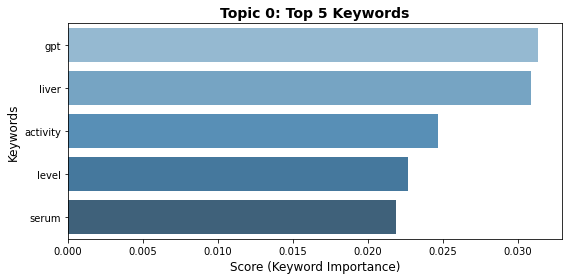

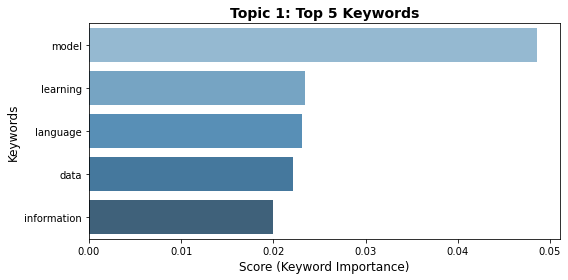

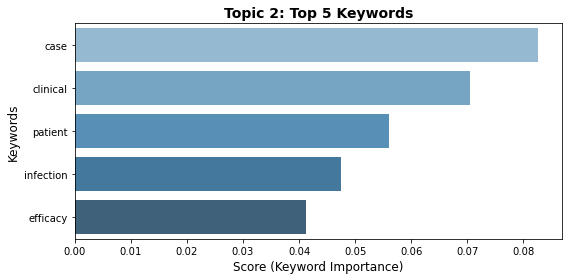

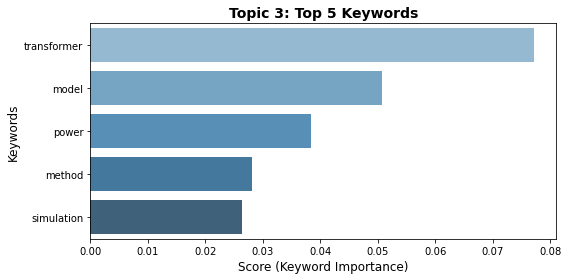

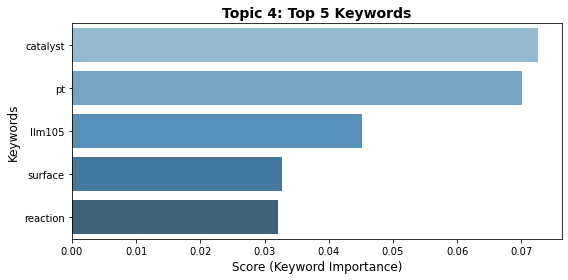

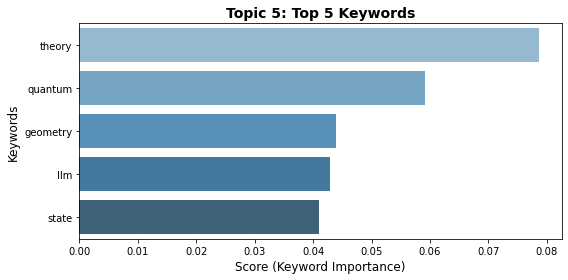

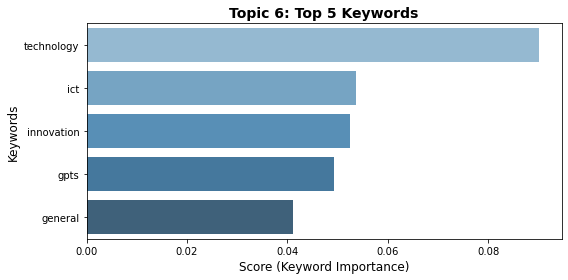

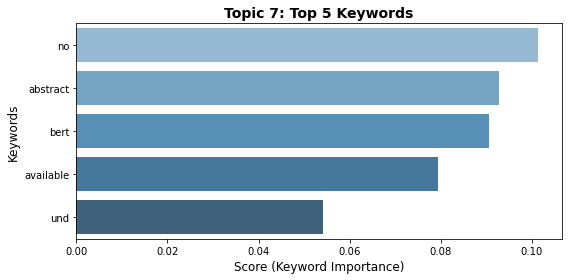

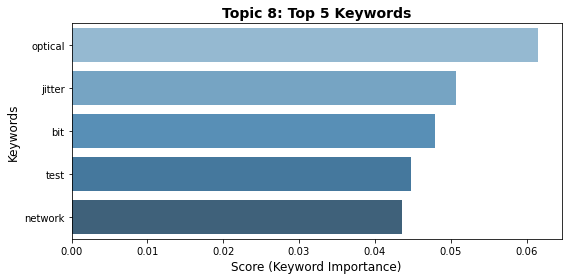

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the top 10 topics and their top 5 keywords with probabilities
top_n_topics = 10
top_n_words = 5

# Create a color palette for consistency
sns.set_palette("Blues_d")  # Use a blue color scheme for all charts

# Step 2: Loop through the top topics and create a bar chart for each
for topic_id in topic_info.head(top_n_topics)['Topic']:
    # Extract the top 5 words and their probabilities for each topic
    topic_words = topic_model.get_topic(topic_id)
    
    # Prepare data for plotting
    words = [word for word, _ in topic_words[:top_n_words]]
    scores = [prob for _, prob in topic_words[:top_n_words]]
    
    # Create a bar plot
    plt.figure(figsize=(8, 4))  # Set figure size for each chart
    sns.barplot(x=scores, y=words, orient='h')  # Horizontal bar plot
    
    # Add title and labels
    plt.title(f'Topic {topic_id}: Top {top_n_words} Keywords', fontsize=14, fontweight='bold')
    plt.xlabel('Score (Keyword Importance)', fontsize=12)
    plt.ylabel('Keywords', fontsize=12)
    
    # Display the plot
    plt.tight_layout()  # Ensure everything fits without overlap
    plt.show()


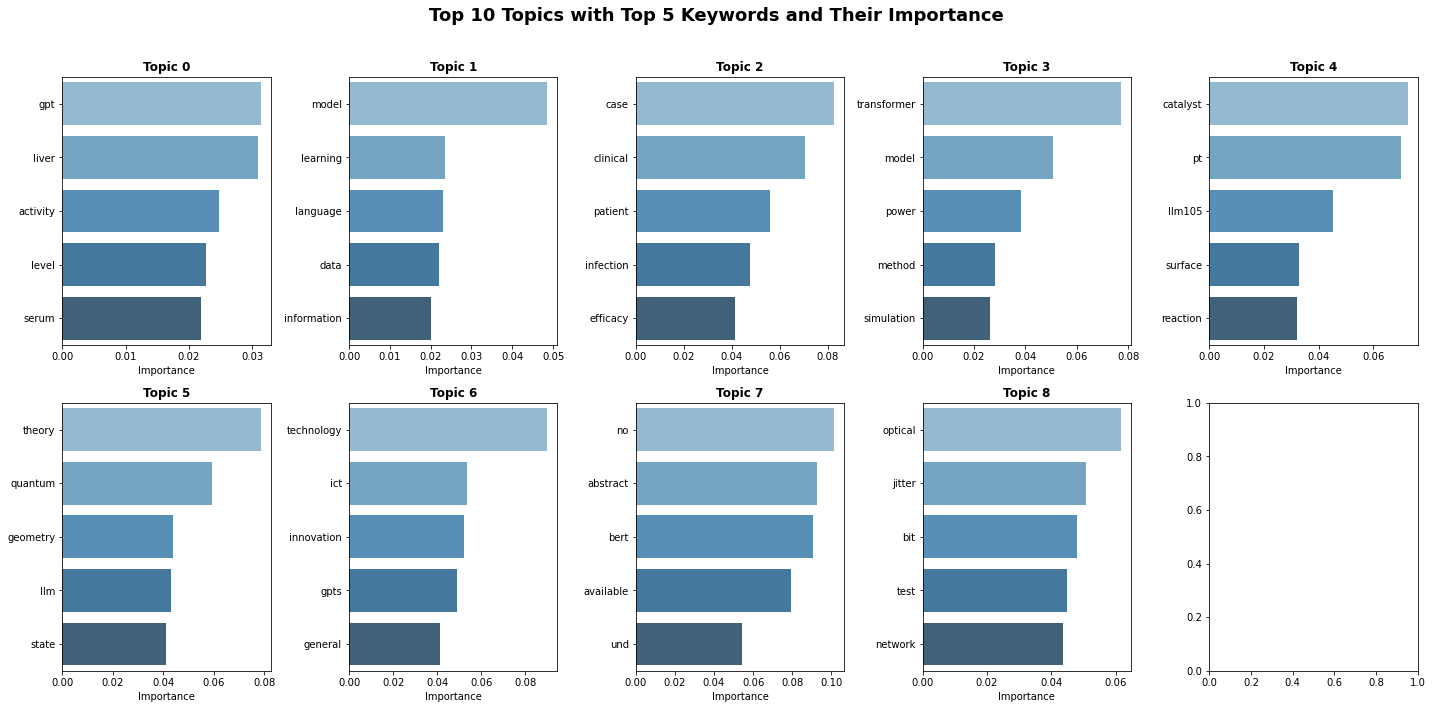

The visualization has been saved as 'top_10_topics_keywords.jpg'.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the top 10 topics and their top 5 keywords with probabilities
top_n_topics = 10
top_n_words = 5

# Create a color palette for consistency
sns.set_palette("Blues_d")  # Use a blue color scheme for all charts

# Step 2: Create a grid layout with subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 rows, 5 columns, total 10 plots
fig.suptitle('Top 10 Topics with Top 5 Keywords and Their Importance', fontsize=18, fontweight='bold')

# Flatten axes for easy iteration
axes = axes.flatten()

# Step 3: Loop through the top topics and create a bar chart for each
for i, topic_id in enumerate(topic_info.head(top_n_topics)['Topic']):
    # Extract the top 5 words and their probabilities for each topic
    topic_words = topic_model.get_topic(topic_id)
    
    # Prepare data for plotting
    words = [word for word, _ in topic_words[:top_n_words]]
    scores = [prob for _, prob in topic_words[:top_n_words]]
    
    # Create a bar plot in the respective subplot
    sns.barplot(x=scores, y=words, orient='h', ax=axes[i])
    
    # Add title and labels
    axes[i].set_title(f'Topic {topic_id}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Importance')
    axes[i].set_ylabel('')

# Step 4: Adjust layout for a tight fit and save the plot as a JPEG file
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit titles and labels
plt.savefig("top_10_topics_keywords.jpg", format='jpg', dpi=300)  # Save the figure as a JPEG file

# Show the final plot
plt.show()

print("The visualization has been saved as 'top_10_topics_keywords.jpg'.")


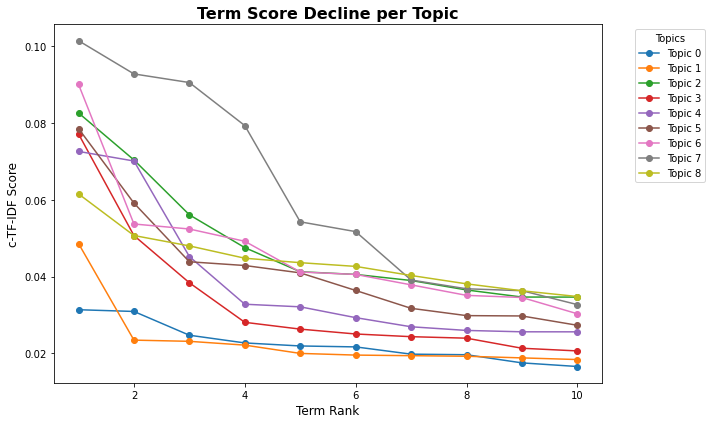

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare data for the top 10 topics
top_n_topics = 10
top_n_words = 10  # We can increase the number of words per topic for more granularity in the line chart

# Create a color palette for the lines
palette = sns.color_palette("tab10", top_n_topics)  # Use a color palette with 10 distinct colors

# Step 2: Initialize the plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Step 3: Loop through the top topics and plot the term rank vs. c-TF-IDF score
for i, topic_id in enumerate(topic_info.head(top_n_topics)['Topic']):
    # Extract the top words and their c-TF-IDF scores for the current topic
    topic_words = topic_model.get_topic(topic_id)
    
    # Prepare the term rank and scores
    ranks = list(range(1, top_n_words + 1))  # Term rank (1, 2, 3, ..., top_n_words)
    scores = [prob for _, prob in topic_words[:top_n_words]]  # c-TF-IDF scores
    
    # Plot the line for the current topic
    plt.plot(ranks, scores, label=f'Topic {topic_id}', color=palette[i], marker='o')
    
# Step 4: Add title, labels, and legend
plt.title('Term Score Decline per Topic', fontsize=16, fontweight='bold')
plt.xlabel('Term Rank', fontsize=12)
plt.ylabel('c-TF-IDF Score', fontsize=12)
plt.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot

# Step 5: Display the plot
plt.tight_layout()
plt.show()


In [50]:
# Step 6: Visualize the topic relationships for the top topics using three methods

# Check the number of topics generated
topic_info = topic_model.get_topic_info()
n_generated_topics = len(topic_info[topic_info.Topic != -1])  # Exclude outliers (-1)

# Display the number of generated topics
print(f"Number of topics generated: {n_generated_topics}")

# Ensure we can reduce to at most the number of topics generated
nr_topics_to_reduce = min(n_generated_topics, 10)  # Choose the minimum between generated topics and 10

# Filter the model to only keep the top topics
topic_model_reduced = topic_model.reduce_topics(documents_processed, nr_topics=nr_topics_to_reduce)

# 1. Intertopic Distance Map for Top Topics
print(f"Visualizing the Intertopic Distance Map for Top {nr_topics_to_reduce} Topics...")
intertopic_distance_fig = topic_model_reduced.visualize_topics()
intertopic_distance_fig.update_layout(
    title=f"Intertopic Distance Map for Top {nr_topics_to_reduce} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)
intertopic_distance_fig.show()

# 2. Hierarchical Clustering of Top Topics
print(f"Visualizing Hierarchical Clustering of Top {nr_topics_to_reduce} Topics...")
hierarchical_clustering_fig = topic_model_reduced.visualize_hierarchy()
hierarchical_clustering_fig.update_layout(
    title=f"Hierarchical Clustering of Top {nr_topics_to_reduce} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)
hierarchical_clustering_fig.show()

# 3. Topic Similarity Matrix (Cosine Similarity Heatmap) for Top Topics
print(f"Visualizing the Topic Similarity Matrix for Top {nr_topics_to_reduce} Topics...")
similarity_matrix_fig = topic_model_reduced.visualize_heatmap()
similarity_matrix_fig.update_layout(
    title=f"Topic Similarity Matrix (Cosine Similarity) for Top {nr_topics_to_reduce} Topics",
    title_font_size=18,
    font=dict(size=12),
    width=900, height=600
)
similarity_matrix_fig.show()


Number of topics generated: 9
Visualizing the Intertopic Distance Map for Top 9 Topics...


Visualizing Hierarchical Clustering of Top 9 Topics...


Visualizing the Topic Similarity Matrix for Top 9 Topics...


In [52]:
%matplotlib inline

In [53]:
import matplotlib.pyplot as plt

# Ensure plots are displayed inline in Jupyter
%matplotlib inline

# Step 6: Visualize the topic relationships for the top topics using three methods

# Check the number of topics generated
topic_info = topic_model.get_topic_info()
n_generated_topics = len(topic_info[topic_info.Topic != -1])  # Exclude outliers (-1)

# Display the number of generated topics
print(f"Number of topics generated: {n_generated_topics}")

# Ensure we can reduce to at most the number of topics generated
nr_topics_to_reduce = min(n_generated_topics, 10)  # Choose the minimum between generated topics and 10

# Filter the model to only keep the top topics
topic_model_reduced = topic_model.reduce_topics(documents_processed, nr_topics=nr_topics_to_reduce)

# 1. Intertopic Distance Map for Top Topics
print(f"Visualizing the Intertopic Distance Map for Top {nr_topics_to_reduce} Topics...")
try:
    intertopic_distance_fig = topic_model_reduced.visualize_topics()
    intertopic_distance_fig.show()
except Exception as e:
    print(f"Error displaying Intertopic Distance Map: {e}")

# 2. Hierarchical Clustering of Top Topics
print(f"Visualizing Hierarchical Clustering of Top {nr_topics_to_reduce} Topics...")
try:
    hierarchical_clustering_fig = topic_model_reduced.visualize_hierarchy()
    hierarchical_clustering_fig.show()
except Exception as e:
    print(f"Error displaying Hierarchical Clustering: {e}")

# 3. Topic Similarity Matrix (Cosine Similarity Heatmap) for Top Topics
print(f"Visualizing the Topic Similarity Matrix for Top {nr_topics_to_reduce} Topics...")
try:
    similarity_matrix_fig = topic_model_reduced.visualize_heatmap()
    similarity_matrix_fig.show()
except Exception as e:
    print(f"Error displaying Topic Similarity Matrix: {e}")


Number of topics generated: 7
Visualizing the Intertopic Distance Map for Top 7 Topics...


Visualizing Hierarchical Clustering of Top 7 Topics...


Visualizing the Topic Similarity Matrix for Top 7 Topics...
